<a href="https://colab.research.google.com/github/rdaniello/DataVizFall2020_Colab/blob/master/Class_Activity_Lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

## Loading US County Level Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
## loading data into dataframe
df = pd.read_csv(db, dtype={"fips": str})


# Explore data

In [ ]:
df.head(5)

date     county       state   fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061      1       0
1  2020-01-22  Snohomish  Washington  53061      1       0
2  2020-01-23  Snohomish  Washington  53061      1       0
3  2020-01-24       Cook    Illinois  17031      1       0
4  2020-01-24  Snohomish  Washington  53061      1       0

In [ ]:

df.nunique()

date        237
county     1923
state        55
fips       3205
cases     16345
deaths     2407
dtype: int64

In [ ]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards


In [ ]:
def get_county_stat(df, in_fips):
  retVal = df[df['fips'].isin([in_fips])].copy().set_index('date')
  retVal.index = pd.to_datetime(retVal.index)
  return retVal

Bristol_fips = '25005'
get_county_stat(df,Bristol_fips).head()

county          state   fips  cases  deaths
date                                                    
2020-03-14  Bristol  Massachusetts  25005      1       0
2020-03-15  Bristol  Massachusetts  25005      1       0
2020-03-16  Bristol  Massachusetts  25005      2       0
2020-03-17  Bristol  Massachusetts  25005      5       0
2020-03-18  Bristol  Massachusetts  25005      5       0

## Explore data type

In [ ]:
df_Bristol = get_county_stat(df,'25005')
df_Suffolk = get_county_stat(df,'25025')


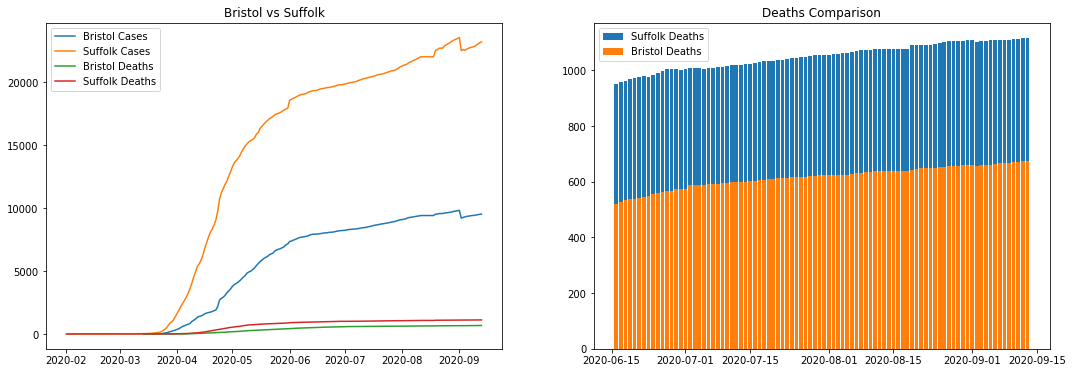

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(df_Bristol.index, df_Bristol.cases, label='Bristol Cases')
ax[0].plot(df_Suffolk.index, df_Suffolk.cases, label='Suffolk Cases')
ax[0].plot(df_Bristol.index, df_Bristol.deaths, label='Bristol Deaths')
ax[0].plot(df_Suffolk.index, df_Suffolk.deaths, label='Suffolk Deaths')

# bar -  with range last 90 days
range = -90;
ax[1].bar(df_Suffolk.index[range:], df_Suffolk.deaths[range:], label='Suffolk Deaths')
ax[1].bar(df_Bristol.index[range:], df_Bristol.deaths[range:], label='Bristol Deaths')

ax[0].set_title('Bristol vs Suffolk')
ax[1].set_title('Deaths Comparison')
ax[0].legend()
ax[1].legend()


## Top 10 counties by number of cases and deaths 



```
# This is formatted as code
```





In [ ]:
# top 10 number of cases and deaths - max used to get last reported date for each fips
df_topCases = df.groupby('fips').max().sort_values(by = ['cases'], ascending=False).head(10)
df_topCases.head(10)

date       county       state   cases  deaths
fips                                                      
06037  2020-09-13  Los Angeles  California  253985    6208
12086  2020-09-13   Miami-Dade     Florida  164085    2882
04013  2020-09-13     Maricopa     Arizona  137507    3158
17031  2020-09-13         Cook    Illinois  134801    5133
48201  2020-09-13       Harris       Texas  116172    2420
48113  2020-09-13       Dallas       Texas   78511    1045
12011  2020-09-13      Broward     Florida   74434    1280
32003  2020-09-13        Clark      Nevada   62650    1260
06065  2020-09-13    Riverside  California   55073    1103
06059  2020-09-13       Orange  California   52121    1093

In [ ]:
# top 10 number of deaths
df_topDeaths = df.groupby('fips').max().sort_values(by = ['deaths'], ascending=False).head(10)
df_topDeaths

date       county          state   cases  deaths
fips                                                         
06037  2020-09-13  Los Angeles     California  253985    6208
17031  2020-09-13         Cook       Illinois  134801    5133
04013  2020-09-13     Maricopa        Arizona  137507    3158
26163  2020-09-13        Wayne       Michigan   33276    2943
12086  2020-09-13   Miami-Dade        Florida  164085    2882
36059  2020-09-13       Nassau       New York   45711    2706
48201  2020-09-13       Harris          Texas  116172    2420
34013  2020-09-13        Essex     New Jersey   20886    2123
25017  2020-09-13    Middlesex  Massachusetts   27732    2105
34003  2020-09-13       Bergen     New Jersey   22209    2046

## Death rate Per FIPS 

In [ ]:
# current death rate by fips
df_topDeaths['death_rate'] = df_topDeaths['cases'] / df_topDeaths['deaths']
df_topDeaths.sort_values(by = ['death_rate'], ascending=False)

date       county          state   cases  deaths  death_rate
fips                                                                     
12086  2020-09-13   Miami-Dade        Florida  164085    2882   56.934421
48201  2020-09-13       Harris          Texas  116172    2420   48.004959
04013  2020-09-13     Maricopa        Arizona  137507    3158   43.542432
06037  2020-09-13  Los Angeles     California  253985    6208   40.912532
17031  2020-09-13         Cook       Illinois  134801    5133   26.261640
36059  2020-09-13       Nassau       New York   45711    2706   16.892461
25017  2020-09-13    Middlesex  Massachusetts   27732    2105   13.174347
26163  2020-09-13        Wayne       Michigan   33276    2943   11.306830
34003  2020-09-13       Bergen     New Jersey   22209    2046   10.854839
34013  2020-09-13        Essex     New Jersey   20886    2123    9.837965

## <font color = red> Bonus Point</font>

### A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate </font>

ALL COUNTIES

<br>

### def Folium_Choropleth(type = 'cases',date=''):

<br>

## Due for Bonus point : Friday (09/11/2020 11:59pm)

In [119]:
import datetime
import json
import plotly.express as px
import folium as folium
import numpy as np
from urllib.request import urlopen
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [134]:
def set_id(fips):
    '''Modify FIPS code to match GeoJSON property'''
    if fips == '0':
        return None
    elif len(fips) <= 4:
        return ''.join(['0500000US0', fips])
    else:
        return ''.join(['0500000US', fips])

def Folium_Choropleth(m_type = 'cases',date=''):
  # get query dates
  e_date = pd.to_datetime(date)
  s_date = e_date - datetime.timedelta(days=7)

  # get data - date as date type
  df = pd.read_csv(db, dtype={"fips": str})
  df['date'] = pd.to_datetime(df['date'])

  # get values on end date
  mask = (df['date'] == e_date)
  df_end = df.loc[mask]

  # get values on start date
  mask = (df['date'] == s_date)
  df_start = df.loc[mask]

  #build mapping dataframe - fips, start and end
  df_start = df_start[df_start['fips'].notnull()] # clean nan before merge
  df_end = df_end[df_end['fips'].notnull()]

  df_start = df_start.rename(columns={"cases":"s_cases", 'deaths':'s_deaths'})
  df_end = df_end.rename(columns={"cases":"e_cases", 'deaths':'e_deaths'})
  df_map = df_start.merge(df_end, on='fips', how='inner')
  df_map['cases'] = df_map['e_cases'] - df_map['s_cases']
  df_map['deaths'] = df_map['e_deaths'] - df_map['s_deaths']

  df_map['death_rate'] = df_map['deaths'] / df_map['cases']
  
  # code for folium library
  # replace inf with 0 where cases = 0
  df_map = df_map.replace(np.inf, 0)
  # max and min for color scale - death rate is special
  maxVal = df_map[m_type].max()
  minVal = df_map[m_type].min()
  bins = [minVal, maxVal * .05, maxVal * .1, maxVal * .3, maxVal]

  map = folium.Map(location=[37, -96], zoom_start=5, tiles="Mapbox Bright")
  folium.Choropleth(geo_data=counties, data=df_map,
             columns=['fips', m_type],
             key_on='feature.id',
             fill_color='YlOrRd', fill_opacity=0.7, line_opacity=0.2,
             bins = bins,
             nan_fill_color = 'white',
             legend_name= m_type).add_to(map)
  return map

  """
  # code using plotly library
  fig = px.choropleth_mapbox(df_map, geojson=counties, locations='fips', color=m_type,
                            color_continuous_scale=[(0, "green"), (0.05, "yellow"), (.1, "red"), (1, "red")],
                            range_color=(0, df_map[m_type].max()),
                            mapbox_style="carto-positron",
                            zoom=3, center = {"lat": 37.0902, "lon": -95.7129},
                            opacity=0.5,
                            labels={'death_rate':'death rate'}
                            )
  fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
  fig.show()"""

# uncomment one of the line below to run 
#map = Folium_Choropleth('cases', '2020-09-09')
map = Folium_Choropleth('deaths', '2020-09-09')
#map = Folium_Choropleth('death_rate', '2020-09-09')
map
